<a href="https://colab.research.google.com/github/Naziyasompalem/AI-Ml_projects/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


In [4]:
dataset = pd.read_csv("dataset 1.csv")

In [5]:
type(dataset)

pandas.core.frame.DataFrame

In [6]:
dataset.shape

(1025, 14)

In [7]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
706,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0
644,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1
490,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
846,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
1009,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0


In [9]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
515,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
769,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
788,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
543,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
657,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [12]:
dataset["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [13]:
dataset["target"].unique()

array([0, 1])

In [14]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


1    526
0    499
Name: target, dtype: int64


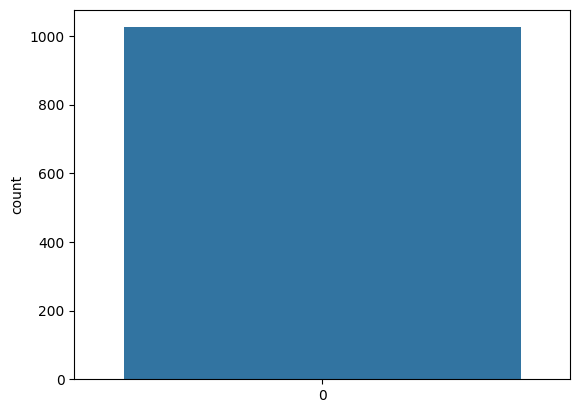

In [15]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


In [17]:
dataset["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

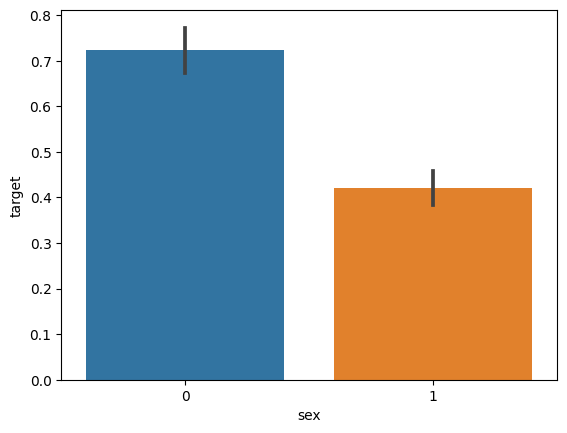

In [35]:
sns.barplot(x=dataset["sex"],y=dataset["target"])

In [29]:
dataset["cp"].unique()

array([0, 1, 2, 3])

<Axes: xlabel='cp', ylabel='target'>

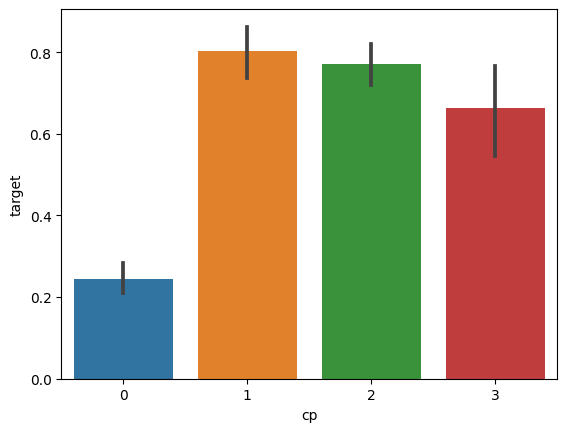

In [38]:
sns.barplot(x=dataset["cp"],y=dataset["target"])

In [39]:
dataset["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [40]:
dataset["fbs"].unique()

array([0, 1])

<Axes: xlabel='fbs', ylabel='target'>

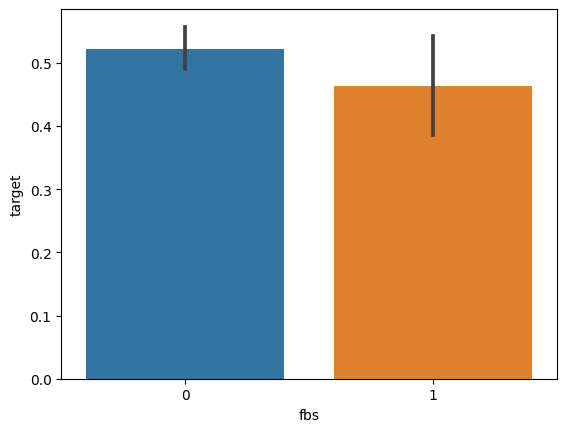

In [42]:
sns.barplot(x=dataset["fbs"],y=dataset["target"])

In [43]:
dataset["restecg"].unique()

array([1, 0, 2])

<Axes: xlabel='restecg', ylabel='target'>

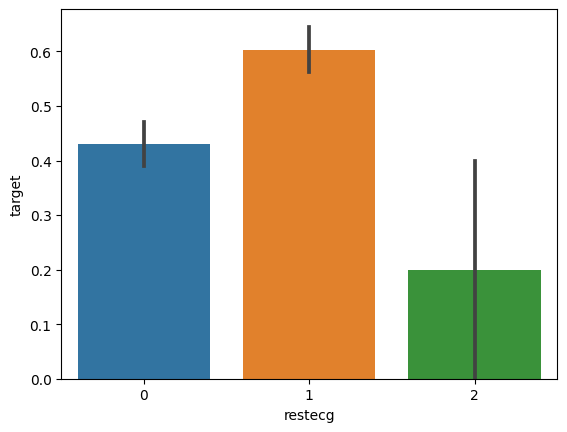

In [44]:
sns.barplot(x=dataset["restecg"],y=dataset["target"])

In [45]:
dataset["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

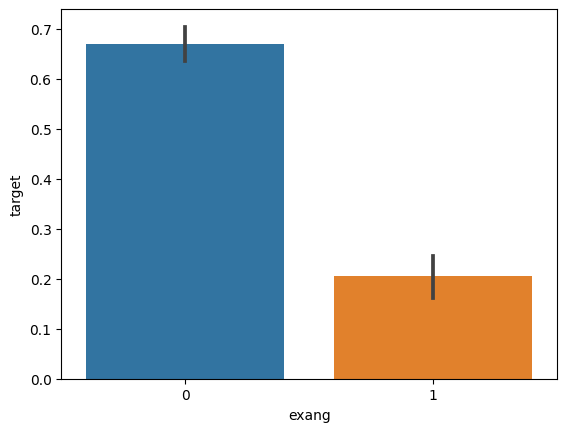

In [46]:
sns.barplot(x=dataset["exang"],y=dataset["target"])

In [47]:
dataset["slope"].unique()

array([2, 0, 1])

<Axes: xlabel='slope', ylabel='target'>

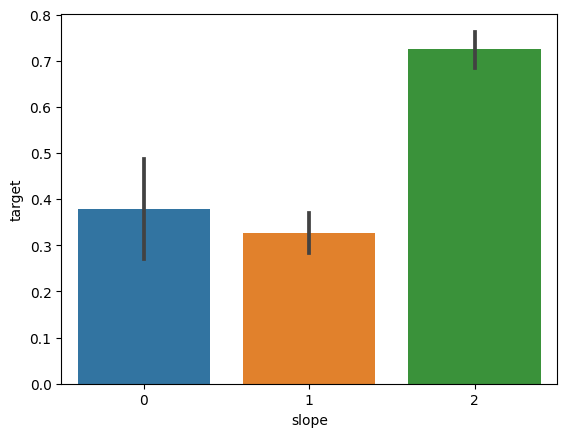

In [48]:
sns.barplot(x=dataset["slope"],y=dataset["target"])

In [49]:
dataset["ca"].unique()

array([2, 0, 1, 3, 4])

<Axes: ylabel='count'>

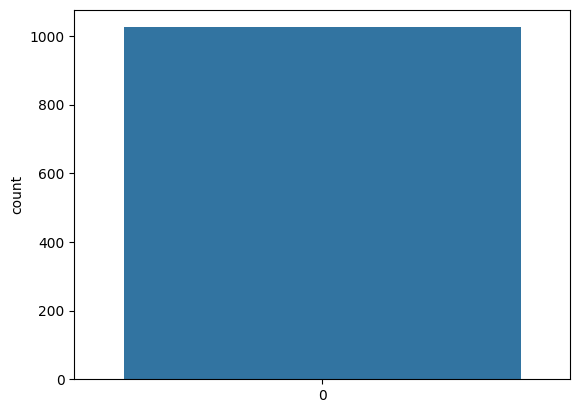

In [51]:
sns.countplot(dataset["ca"])

<Axes: xlabel='ca', ylabel='target'>

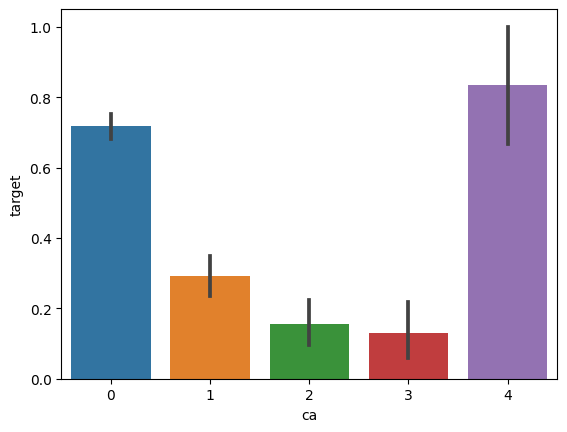

In [53]:
sns.barplot(x=dataset["ca"],y=dataset["target"])

In [54]:
dataset["thal"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='thal', ylabel='target'>

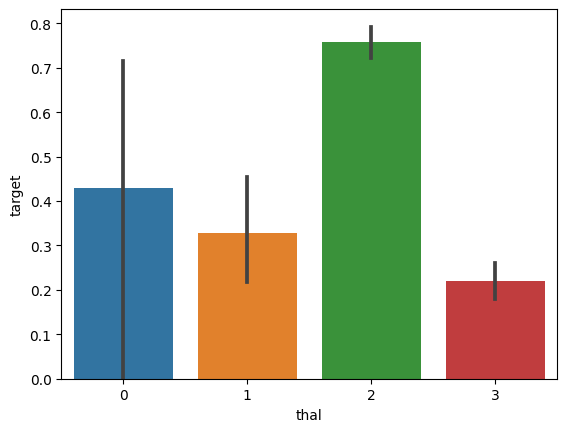

In [55]:
sns.barplot(x=dataset["thal"],y=dataset["target"])

<Axes: xlabel='thal', ylabel='Density'>

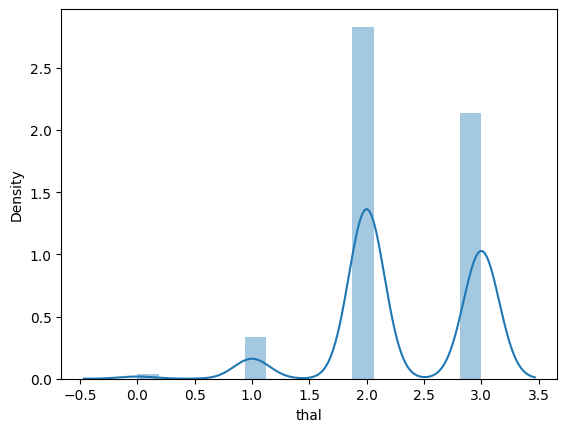

In [56]:
sns.distplot(dataset["thal"])

In [57]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [58]:
X_train.shape

(820, 13)

In [59]:
X_test.shape

(205, 13)

In [60]:
Y_train.shape

(820,)

In [61]:
Y_test.shape

(205,)

In [62]:
from sklearn.metrics import accuracy_score

**Logistic Regression**

In [63]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [64]:
Y_pred_lr.shape

(205,)

In [65]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


**Naive Bayes**

In [66]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [67]:
Y_pred_nb.shape

(205,)

In [68]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


**SVM**

In [69]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [70]:
Y_pred_svm.shape

(205,)

In [71]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


**K Nearest Neighbors**

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [73]:
Y_pred_knn.shape

(205,)

In [74]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


**Decision Tree**

In [75]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [76]:
print(Y_pred_dt.shape)

(205,)


In [79]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [82]:
Y_pred_rf.shape

(205,)

In [83]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


**XGBoost**

In [84]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [85]:
Y_pred_xgb.shape

(205,)

In [86]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 100.0 %


**Neural Network**

In [87]:
from keras.models import Sequential
from keras.layers import Dense

In [88]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [89]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
26/26 [==============================] - 4s 9ms/step - loss: 9.8078 - accuracy: 0.4463
Epoch 2/300
26/26 [==============================] - 1s 20ms/step - loss: 5.0031 - accuracy: 0.4354
Epoch 3/300
26/26 [==============================] - 0s 12ms/step - loss: 3.9616 - accuracy: 0.4476
Epoch 4/300
26/26 [==============================] - 0s 10ms/step - loss: 2.9194 - accuracy: 0.4707
Epoch 5/300
26/26 [==============================] - 0s 12ms/step - loss: 2.0928 - accuracy: 0.5000
Epoch 6/300
26/26 [==============================] - 0s 4ms/step - loss: 1.4724 - accuracy: 0.5720
Epoch 7/300
26/26 [==============================] - 0s 4ms/step - loss: 1.1014 - accuracy: 0.6268
Epoch 8/300
26/26 [==============================] - 0s 3ms/step - loss: 0.9375 - accuracy: 0.6549
Epoch 9/300
26/26 [==============================] - 0s 4ms/step - loss: 0.8727 - accuracy: 0.6451
Epoch 10/300
26/26 [==============================] - 0s 5ms/step - loss: 0.8023 - accuracy: 0.6768
Epoch

In [90]:
Y_pred_nn = model.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [91]:
Y_pred_nn.shape

(205, 1)

In [92]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [93]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 78.54 %


**VI. Output final score**

In [94]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %
The accuracy score achieved using Naive Bayes is: 85.37 %
The accuracy score achieved using Support Vector Machine is: 83.9 %
The accuracy score achieved using K-Nearest Neighbors is: 72.2 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Random Forest is: 100.0 %
The accuracy score achieved using XGBoost is: 100.0 %
The accuracy score achieved using Neural Network is: 78.54 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

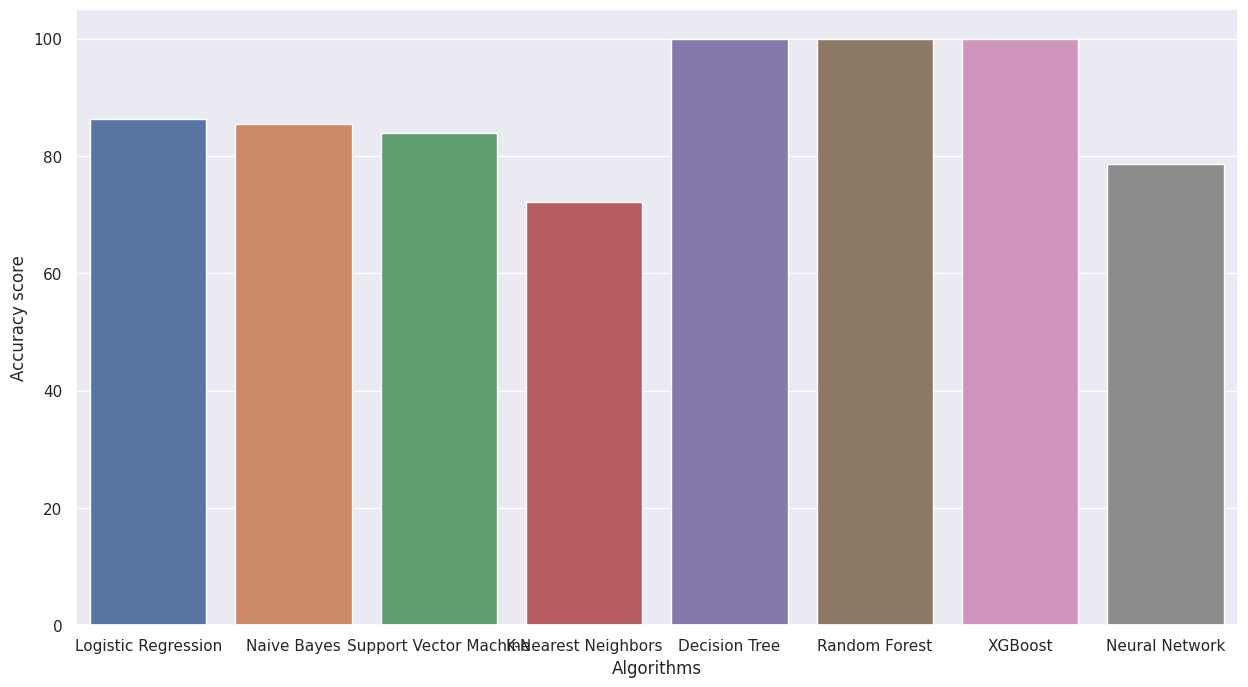

In [96]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

**decision tree,random forest ,XGBoost got 100% accuracy**

